# Name: Wajhi ur rehman qureshi
# Roll no : 22f-bsai-50
# Department: Artificial Intelligence
# Subject: Programming of Artificial Intelligence
# Assignenment of Programming of Artificial Intelligence
# Teacher: Sir Hamza

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("patient_data.csv")

df.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


In [2]:
# Use VarianceThreshold to remove constant features (if any).
from sklearn.feature_selection import VarianceThreshold

import pandas as pd
import numpy as np

df = pd.read_csv("patient_data.csv")
numeric_df = df.select_dtypes(include=[np.number])

sample = VarianceThreshold(threshold=0.1)
clean_data = sample.fit_transform(numeric_df)

print(clean_data)

[[  1.   37.  193.4 129.4]
 [  2.   45.  210.7 107.1]
 [  3.   63.  244.3 103.9]
 [  4.   53.  184.5 127.2]
 [  5.   29.  175.7 116.6]
 [  6.   55.  184.9 130.7]
 [  7.   33.  227.5 127.1]
 [  8.   50.  209.9 118.9]
 [  9.   67.  184.1 107.3]
 [ 10.   34.  215.4  97.3]
 [ 11.   27.  202.9 113.3]
 [ 12.   33.  229.1 132.8]
 [ 13.   42.  178.9 123.2]
 [ 14.   79.  190.2 101.3]
 [ 15.   76.  188.2 122.6]
 [ 16.   59.  156.1 125.8]
 [ 17.   40.  208.9 106.7]
 [ 18.   35.  207.8 122.3]
 [ 19.   64.  200.2 120.9]
 [ 20.   37.  193.  102.9]
 [ 21.   66.  157.5 125.4]
 [ 22.   72.  187.4 128.4]
 [ 23.   43.  189.7 136.2]
 [ 24.   45.  175.9 135.8]
 [ 25.   44.  195.2  99.3]
 [ 26.   79.  212.1 105.9]
 [ 27.   79.  256.6 127.7]
 [ 28.   79.  205.2 127.7]
 [ 29.   64.  207.7 127.7]
 [ 30.   60.  197.8 177.8]
 [ 31.   48.  142.4 128.6]
 [ 32.   34.  199.2 137. ]
 [ 33.   64.  201.8 134.3]
 [ 34.   20.  273.9 129.8]
 [ 35.   44.  194.2 115.3]
 [ 36.   26.  209.  131.4]
 [ 37.   28.  199.  108.4]
 

**Q1:** Outlier Detection and Feature Reduction Use VarianceThreshold to remove constant features (if any). - Detect and remove outliers from CholesterolLevel using any method of choice. - Replace any missing values.

In [3]:
# Removing the outlier
import pandas as pd

df = pd.read_csv("patient_data.csv")

mean = float(df.CholesterolLevel.mean())
median = float(df.CholesterolLevel.median())
# mode = float(df.CholesterolLevel.mode())
std_daviation = float(df.CholesterolLevel.std())

print(f"Mean:{mean} /n Median: {median}")
print(f"Std daviation:{std_daviation}")

u_outlier_v = mean + 2*std_daviation
print(u_outlier_v)

l_outlier_v = mean - 2*std_daviation
print(l_outlier_v)

upper_outlier = df[df['CholesterolLevel'] > u_outlier_v]
print(f"Upper outlier: \n {upper_outlier}")

lower_outlier = df[df['CholesterolLevel'] < l_outlier_v]
print(f"\n Lower outlier: \n {lower_outlier}")

# printing the value without outlier
v_without_outlier = df[(df['CholesterolLevel'] >= l_outlier_v) & (df['CholesterolLevel'] <= u_outlier_v)]
print(f"\nData without outliers:\n{v_without_outlier}")

only_on_outlier = df[(df['CholesterolLevel'] < l_outlier_v) | (df['CholesterolLevel'] > u_outlier_v)]
print(f"\n only outlier:\n{only_on_outlier}")

Mean:201.77699999999996 /n Median: 202.5
Std daviation:28.236801171592376
258.2506023431847
145.3033976568152
Upper outlier: 
     PatientID  Gender  Age  CholesterolLevel  BloodPressure Region  \
33         34  Female   20             273.9          129.8  South   
45         46  Female   27             265.7          136.3  South   
99        100    Male   23             281.6          114.2  North   

   RiskCategory  
33         High  
45         High  
99         High  

 Lower outlier: 
     PatientID Gender  Age  CholesterolLevel  BloodPressure Region RiskCategory
30         31   Male   48             142.4          128.6   East       Medium

Data without outliers:
    PatientID  Gender  Age  CholesterolLevel  BloodPressure Region  \
0           1    Male   37             193.4          129.4   East   
1           2  Female   45             210.7          107.1   West   
2           3    Male   63             244.3          103.9   West   
3           4    Male   53             

Replace missing values in each column with the column's mean

In [4]:
# Replace missing values in each column with the column's mean
df.fillna(df.mean(numeric_only=True), inplace=True)

print("Missing values handled successfully.")
print(df.isnull().sum())  # To confirm no missing values remain

Missing values handled successfully.
PatientID           0
Gender              0
Age                 0
CholesterolLevel    0
BloodPressure       0
Region              0
RiskCategory        0
dtype: int64


Q2: Data **Visualization**

/tmp/ipython-input-11-3150783089.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='RiskCategory', y='BloodPressure', palette='Set2')


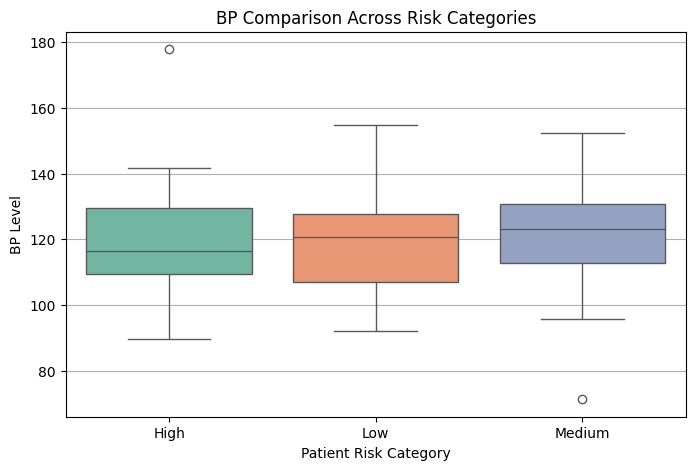

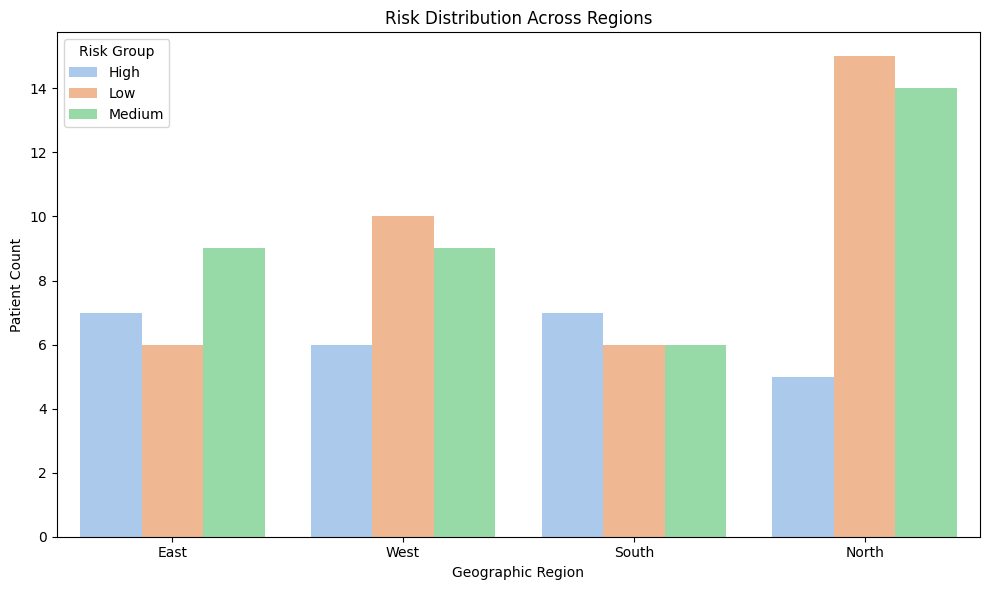

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df

# Part 2: Chi-square test
clean = df.dropna(subset=['Region', 'RiskCategory'])

# Blood Pressure by Risk Category (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='RiskCategory', y='BloodPressure', palette='Set2')
plt.title('BP Comparison Across Risk Categories')
plt.ylabel('BP Level')
plt.xlabel('Patient Risk Category')
plt.grid(True, axis='y')
plt.show()
# Region-wise Risk Category Counts
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region', hue='RiskCategory', palette='pastel')
plt.title('Risk Distribution Across Regions')
plt.xlabel('Geographic Region')
plt.ylabel('Patient Count')
plt.legend(title='Risk Group')
plt.tight_layout()
plt.show()

**Q3: Statistical Hypothesis Testing**

In [12]:
from scipy import stats
import numpy as np

# Random sample of 20 cholesterol levels
np.random.seed(12)
chol_sample = processed['CholesterolLevel'].sample(20)

# T-test against known value (e.g., 200 mg/dL)
t_value, p_result = stats.ttest_1samp(chol_sample, 200)

print("T-Score:", t_value)
print("P-Value:", p_result)
#part 2
clean['Region'] = df['Region']
clean['RiskCategory'] = df['RiskCategory']

table = pd.crosstab(clean['Region'], clean['RiskCategory'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(table)

print("Chi-Square Test:")
print("Chi2 =", chi2)
print("P-value =", p)

if p < 0.05:
    print("Region and RiskCategory are independent")
else:
    print("Region and RiskCategory are dependent")

T-Score: -0.42030306129333633
P-Value: 0.6789792496274561
Chi-Square Test:
Chi2 = 4.537654289304933
P-value = 0.6043217060679176
Region and RiskCategory are dependent


**Q4: Modeling a Health System with ODE**

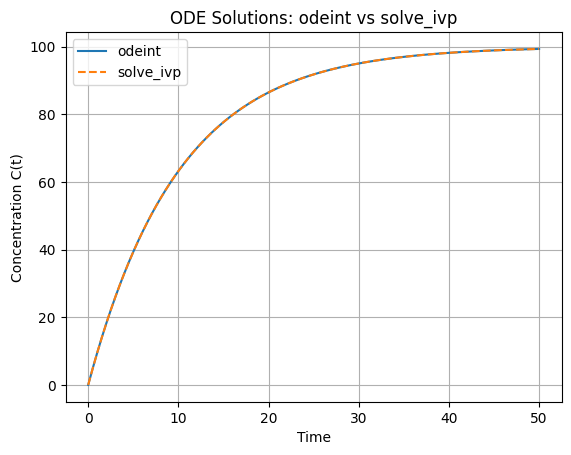

In [10]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

k = 0.1
D = 100

# Differential equation
def dCdt(t, C):
    return k * (D - C)

C0 = 0
t = np.linspace(0, 50, 100)

# Solve using odeint
sol1 = odeint(dCdt, y0=C0, t=t, tfirst=True)
solodeint = sol1.T[0]

# Solve using solve_ivp
sol2 = solve_ivp(dCdt, t_span=(0, max(t)), y0=[C0], t_eval=t)
solivp = sol2.y[0]

# Plotting
plt.plot(t, solodeint, label='odeint')
plt.plot(t, solivp, '--', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Concentration C(t)')
plt.title('ODE Solutions: odeint vs solve_ivp')
plt.legend()
plt.grid(True)
plt.show()
